In [21]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt

from world import World
from utils import getpolicy, getvalue

plt.rcParams['figure.facecolor'] = 'white'

In [22]:
# Initialization
# Initialize the world, Q-table, and hyperparameters

worldNr = 4
world = World(worldNr)
actions = list(range(1, 5))
Q_table = -np.random.rand(world.y_size, world.x_size, len(actions))
Q_table[world.term[0], world.term[1], :] = np.zeros(len(actions))
Q_table[world.y_size-1, :, 0] = -np.inf*np.ones(world.x_size) # Down
Q_table[0, :, 1] = -np.inf*np.ones(world.x_size) # Up
Q_table[:, world.x_size-1, 2] = -np.inf*np.ones(world.y_size) # Right
Q_table[:, 0, 3] = -np.inf*np.ones(world.y_size) # Left

In [23]:
# Training loop
# Train the agent using the Q-learning algorithm.

learning_rate = 0.2
discount_factor = 0.95
exploration_factor_range = (0.95, 0.5)
episodes = 50000

for episode in range(episodes):
    percentage = (episode+1)/episodes
    print(f"{int(percentage*100)}%", end="\r")
    exploration_factor = exploration_factor_range[0] - ((exploration_factor_range[0] - exploration_factor_range[1]) * percentage)
    world = World(worldNr)
    while (world.pos != world.term):
        valid, feedback = False, []
        current_pos = world.pos
        while (not valid):
            if (np.random.rand() < (1 - exploration_factor)):
                action = getpolicy(Q_table)[world.pos] + 1
            else:
                action = np.random.choice(actions)
            valid, feedback = world.action(action)
        state = (*current_pos, action-1)
        Q_table[state] = (1-learning_rate)*Q_table[state] + learning_rate*(feedback + discount_factor*getvalue(Q_table)[world.pos])


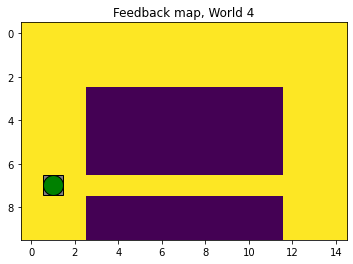

In [24]:
# Test loop
# Test the agent (subjectively) by letting it use the optimal policy to traverse the gridworld.
# Do not update the Q-table when testing.
# Also, you should not explore when testing, i.e. epsilon=0; always pick the optimal action.

policy = getpolicy(Q_table)
world = World(worldNr)
while (world.pos != world.term):
    world.action(policy[world.pos]+1)
    world.draw()

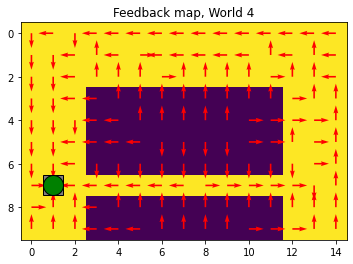

In [25]:
policy = getpolicy(Q_table)
world.draw(policy=policy)

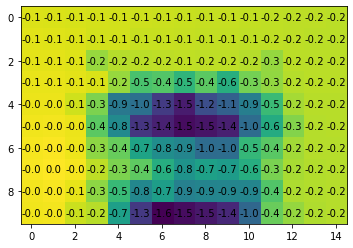

In [26]:
plt.imshow(getvalue(Q_table))
for (j,i),label in np.ndenumerate(getvalue(Q_table)):
    plt.text(i, j, round(label,1), ha='center', va='center')